## 1. Download per-protein annotations from Uniprot

To download information from Uniprot, as we've seen you can get all information for an entry as XML or JSON file. This is useful because it contains all available information for that protein.

However, if we are only interested in a couple of features for a big list of proteins, it would be a lot of extra overhead to first download all the big files, and then pull out a small amount of data from them. Therefore, Uniprot provided the **tab** format. This a plain text file where every column depicts one feature and each row is an entry.
You can easily parse these files with Python libraries to deal with data files like [pandas](01.b.pandas.ipynb), 
or even open them with excel. We will see how to manipulate data with Pandas in the next WPO.

For a set of proteins listed in a multiple sequence alignment, we will have to provide a search query, but in addition you also have to provide a list columns you are interested in. To know which columns you can choose from, please follow this [link](https://www.uniprot.org/help/uniprotkb_column_names). As you can see, there are a lot of features, so we will have to decide which ones we will pursue for analysis.

If you run into problems with 'ModuleNotFoundError', notably for 'pandas', you have to open your conda terminal (on Windows) or open a terminal window (on Mac/Linux), and type:

```conda install pandas```

That should install the code for you.

You also have to change the name of the file with your alignment in below code block, go to 'Cell' and click 'Run all'.

Also play around with the `columns` in below code to see which information you can download, and what could be interesting to use.

The data is saved in a local file called `proteins.tab` - you can also change that file name to save into a different file.

We start from an alignment file generated by Uniprot, first a BLAST on uniref90, keep 100 sequences, then align these, and input the alignment you get from there.

In [1]:
from apiFunctions import uniprotDownload, enaDownload
from utils import extractFastaInfo, extractClustalInfo
import pandas as pd

# Here set the format of your input file as a string (fasta or clustal)
# and define the name of your multiple sequence alignment (MSA) file.
# Note that this MSA file has to be in the same directory as this Jupyter file
fileFormat = 'fasta'
msaFilePath = "final_msa.fasta"

# Extract the information
if fileFormat == 'fasta':
    (seqAlignInfo,seqIds) = extractFastaInfo(msaFilePath)
elif fileFormat == 'clustal':
    (seqAlignInfo,seqIds) = extractClustalInfo(msaFilePath)
else:
    print("No valid file format given.")

print(seqIds)

# Here define the output file that will contain all the Uniprot information
# Note that you can change this name if you want to save data for different MSAs
# or if you change the data you want to get (in columns)
fileName="proteins.tab"

# You can find possible columns on this page https://www.uniprot.org/help/uniprotkb_column_names
columns="id,entry name,genes,organism,comment(PTM),3d,database(EMBL),database(GenBank),database(GeneID),lineage(all)"

query="id:"+"+OR+id:".join(seqIds)
format="tab"

# Download File from uniprot
uniprotDownload(fileName,query=query, format=format, columns=columns)

# Show with Pandas
proteinInfo = pd.read_csv(fileName, sep="\t").set_index("Entry").sort_index()
proteinInfo
print(proteinInfo.index.values.tolist())

['P02144', 'P02166', 'P02150', 'P02165', 'P02189', 'P68084', 'P68086', 'P68085', 'P02147', 'P20856', 'P02145', 'A0A024R1G3', 'A0A1K0FU49', 'F2Z2F1', 'A0A2J8QPD0', 'B0QYF8', 'A0A2K6NL17', 'R9RZM3', 'A0A3Q7VSZ0', 'A0A6P3EQL6', 'A0A6I9IAX0', 'F6PMG4', 'A0A250XVB6', 'A0A1K0GGA6', 'G7N3Q2', 'G7PFA9', 'A0A2K6DJM1', 'R9S070', 'R9RZA9', 'A0A2T4CW89', 'A0A2K5NML8', 'A0A0D9R744', 'A0A2K5YL59', 'A0A2K6M9S1', 'A0A2K5JJ98', 'G3R764', 'R9RZ90', 'A0A6G1B1B0', 'A0A091D6D3', 'A0A663D630', 'A0A2J8QPC5', 'A0A2R9BL13', 'A0A2J8QPC2', 'A0A2J8QPD7', 'A0A2J8QPB9', 'UPI000C2AAD7E', 'UPI000C29E88A', 'UPI00136447F5', 'UPI000CEFDAE9']
['A0A024R1G3', 'A0A091D6D3', 'A0A0D9R744', 'A0A1K0FU49', 'A0A1K0GGA6', 'A0A250XVB6', 'A0A2J8QPB9', 'A0A2J8QPC2', 'A0A2J8QPC5', 'A0A2J8QPD0', 'A0A2J8QPD7', 'A0A2K5JJ98', 'A0A2K5NML8', 'A0A2K5YL59', 'A0A2K6DJM1', 'A0A2K6M9S1', 'A0A2K6NL17', 'A0A2R9BL13', 'A0A2T4CW89', 'A0A3Q7VSZ0', 'A0A663D630', 'A0A6G1B1B0', 'A0A6I9IAX0', 'A0A6P3EQL6', 'B0QYF8', 'F2Z2F1', 'F6PMG4', 'G3R764', 'G7N3Q2'

## 2. Get DNA sequence for the protein sequences
The plan is to then get the DNA sequence for these proteins. This is not as simple as it sounds, as the protein sequence is the result of curation of multiple DNA sequences. We will therefore 'backtranslate' the protein sequences to DNA, and use for the encoding the organism that is closest to the one source one for your target protein.

In [2]:
# Backtranslate the protein sequences


# This is not yet ready

## 3. Get information per protein sequence using Biopython
We can also get per-protein information using the Biopython package, as illustrated below. Install biopython if necessary:

```conda install biopython```

The biopython code runs on the sequences without gaps, so we also transform these below.

In [3]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis

import json

#seqIds = ids
seqsDict = {}
for seqId in seqAlignInfo.keys():
    seqsDict[seqId] = seqAlignInfo[seqId].replace("-","")

print(seqIds[2])
print(seqsDict[seqIds[2]])

X = ProteinAnalysis(seqsDict[seqIds[2]])

print("Number residues: {}".format(X.count_amino_acids()))
print("Number of A: {}".format(X.count_amino_acids()['A']))
print("Number of E: {}".format(X.count_amino_acids()['E']))

print("% of A: {:.2f}".format(X.get_amino_acids_percent()['A'] * 100))
print("MW: {:.2f}".format(X.molecular_weight()))
print("Aromaticity: {:.2f}".format(X.aromaticity()))
print("Instability: {:.2f}".format(X.instability_index()))
print("Isoelectric point: {:.2f}".format(X.isoelectric_point()))
print("Flexibility per residue: {}".format(X.flexibility()))

secStruc = X.secondary_structure_fraction()
print("{:.2f}".format(secStruc[0])) # Helix
print("{:.2f}".format(secStruc[1])) # Sheet
print("{:.2f}".format(secStruc[2])) # Coil

P02150
MGLSDGEWQLVLNVWGKVEADIPSHGQEVLIRLFKGHPETLEKFDKFKHLKSEDEMKASEDLKKHGVTVLTALGGILKKKGHHEAEIKPLAQSHATKHKIPVKYLELISESIIQVLQSKHPGDFGADAQGAMNKALELFRNDMAAKYKELGFQG
Number residues: {'A': 12, 'C': 0, 'D': 8, 'E': 14, 'F': 6, 'G': 14, 'H': 9, 'I': 8, 'K': 20, 'L': 18, 'M': 4, 'N': 3, 'P': 5, 'Q': 7, 'R': 2, 'S': 8, 'T': 4, 'V': 8, 'W': 2, 'Y': 2}
Number of A: 12
Number of E: 14
% of A: 7.79
MW: 17175.60
Aromaticity: 0.06
Instability: 22.26
Isoelectric point: 7.14
Flexibility per residue: [1.0153333333333332, 1.0330714285714286, 0.9761904761904762, 1.0222857142857142, 0.9683690476190475, 0.9727619047619048, 0.9637738095238094, 0.9819285714285714, 0.950261904761905, 0.9666071428571428, 1.0079047619047619, 1.011904761904762, 0.9791785714285715, 1.0409285714285714, 0.998297619047619, 1.0373690476190478, 0.9899047619047621, 1.0328690476190476, 1.0142142857142857, 0.9977857142857142, 1.0297619047619047, 1.0134642857142857, 1.020357142857143, 0.9701785714285714, 0.985595238095238, 0.9713571428571

## 4. Get per-residue predictions via an API
We can then also get other types of information, for example predictions of the protein behavior. In this case, we have to map back the information from the prediction (which works on an uninterrupted protein sequence) to the multiple sequence alignment to create a matrix of information that relates to the multiple sequence alignment itself.

In [4]:
import requests
import json
import time

WAIT_TIME = 5
TOTAL_TIME = 300

## input parameters ##
url = 'https://bio2byte.be/msatools/'
apiUrl = url + 'api/'

def getDataForMsa(inputFile,outputFile):

    # Read input MSA file
    file = open(inputFile, 'r')
    inputData = file.read()
    
    request_json = {"token": "J1H5G3F2D2", "tool": 'msatoolsproteins', 'file_content': inputData}
    
    print(request_json)
    print("Posting data to server...")
    # Make POST request with Json Input body
    r = requests.post(url = apiUrl, data=request_json)
    get_address = json.loads(r.content.decode("utf-8"))["Location"]
    resultUrl = url + get_address
    
    print("Fetching results...")

    # Now get results - this will happen when results available or when time limit reached   
    time_waited = 0
    while time_waited / TOTAL_TIME < 1.0:

      # Get Request
      response = requests.get(resultUrl)
      
      if response.status_code == 202:
        print("  Waiting for results...")

      elif response.status_code == 200:
        queryResults = json.loads(response.text)
        break
       
      else:
        print("Server error, response {}.".format(response.status_code))
        break
      
      time.sleep(WAIT_TIME)
      time_waited += WAIT_TIME

    # save the results to a json file
    predJsonData = json.dumps(queryResults)
    f = open(outputFile, "w")
    f.write(predJsonData)
    f.close()

    return queryResults


# This is the file where the predictions are saved - change the name if you re-run this
# for another protein!
predJsonFile = 'predictions.json'

results = getDataForMsa(msaFilePath,predJsonFile)
    
print(results)


{'token': 'J1H5G3F2D2', 'tool': 'msatoolsproteins', 'file_content': '>P02144\n--------------------------------------MGLSDGEWQLVLNVWGKVEADI\nPGHGQEVLIRLFKGHPETLEKFDKFKHLKSEDEMKASEDLKKHGATVLTALGGILKKKGH\nHEAEIKPLAQSHATKHKIPVKYLEFISECIIQVLQSKHPGDFGADAQGAMNKALELFRKD\nMASNYKELGFQG\n>P02166\n--------------------------------------MGLSDGEWQSVLNVWGKVEADL\nAGHGQEILIRLFTAHPETLEKFDKFKNLKTPDEMKASEDLKKHGVTVLTALGGILKKKGH\nHEAEIKPLAQSHATKHKIPVKYLEFISEAIIHVLQSKHPGDFGADAQGAMNKALELFRND\nIAAKYKELGFQG\n>P02150\n--------------------------------------MGLSDGEWQLVLNVWGKVEADI\nPSHGQEVLIRLFKGHPETLEKFDKFKHLKSEDEMKASEDLKKHGVTVLTALGGILKKKGH\nHEAEIKPLAQSHATKHKIPVKYLELISESIIQVLQSKHPGDFGADAQGAMNKALELFRND\nMAAKYKELGFQG\n>P02165\n--------------------------------------MGLSDGEWQLVLNVWGKVEADV\nAGHGQEVLIRLFKGHPETLEKFDKFKHLKTEDEMKASEDLKKHGNTVLSALGGILKKKGQ\nHEAEIKPLAQSHATKHKIPVKYLEFISEAIIQVLQSKHPGDFGADAQAAMSKALELFRND\nIAAKYKELGFQG\n>P02189\n--------------------------------------MGLSDGEWQLVLNVWGKVEADV\nAGHGQEVLIRLFKGHPETLEKFDK

Fetching results...
  Waiting for results...
  Waiting for results...
  Waiting for results...
  Waiting for results...
  Waiting for results...
  Waiting for results...
  Waiting for results...
  Waiting for results...
  Waiting for results...
  Waiting for results...
  Waiting for results...
  Waiting for results...
  Waiting for results...
  Waiting for results...
  Waiting for results...
  Waiting for results...
  Waiting for results...
  Waiting for results...
  Waiting for results...
  Waiting for results...
  Waiting for results...
{'id': 2429, 'results': [{'proteinID': 'A0A024R1G3', 'sequence': ['M', 'E', 'L', 'G', 'C', 'Q', 'V', 'C', 'K', 'Y', 'C', 'A', 'M', 'G', 'L', 'S', 'D', 'G', 'E', 'W', 'Q', 'L', 'V', 'L', 'N', 'V', 'W', 'G', 'K', 'V', 'E', 'A', 'D', 'I', 'P', 'G', 'H', 'G', 'Q', 'E', 'V', 'L', 'I', 'R', 'L', 'F', 'K', 'G', 'H', 'P', 'E', 'T', 'L', 'E', 'K', 'F', 'D', 'K', 'F', 'K', 'H', 'L', 'K', 'S', 'E', 'D', 'E', 'M', 'K', 'A', 'S', 'E', 'D', 'L', 'K', 'K', 'H', 'G',

We can then also visualise the results. If you get an matplotlib error, again install it from the Conda terminal with this command:

```conda install matplotlib```

Note that we have multiple results, you can change the currentProteinIndex in code below to get the results for other proteins (don't forget to go to 'Cell' and click 'Run Cells' to re-run this particular code block!).

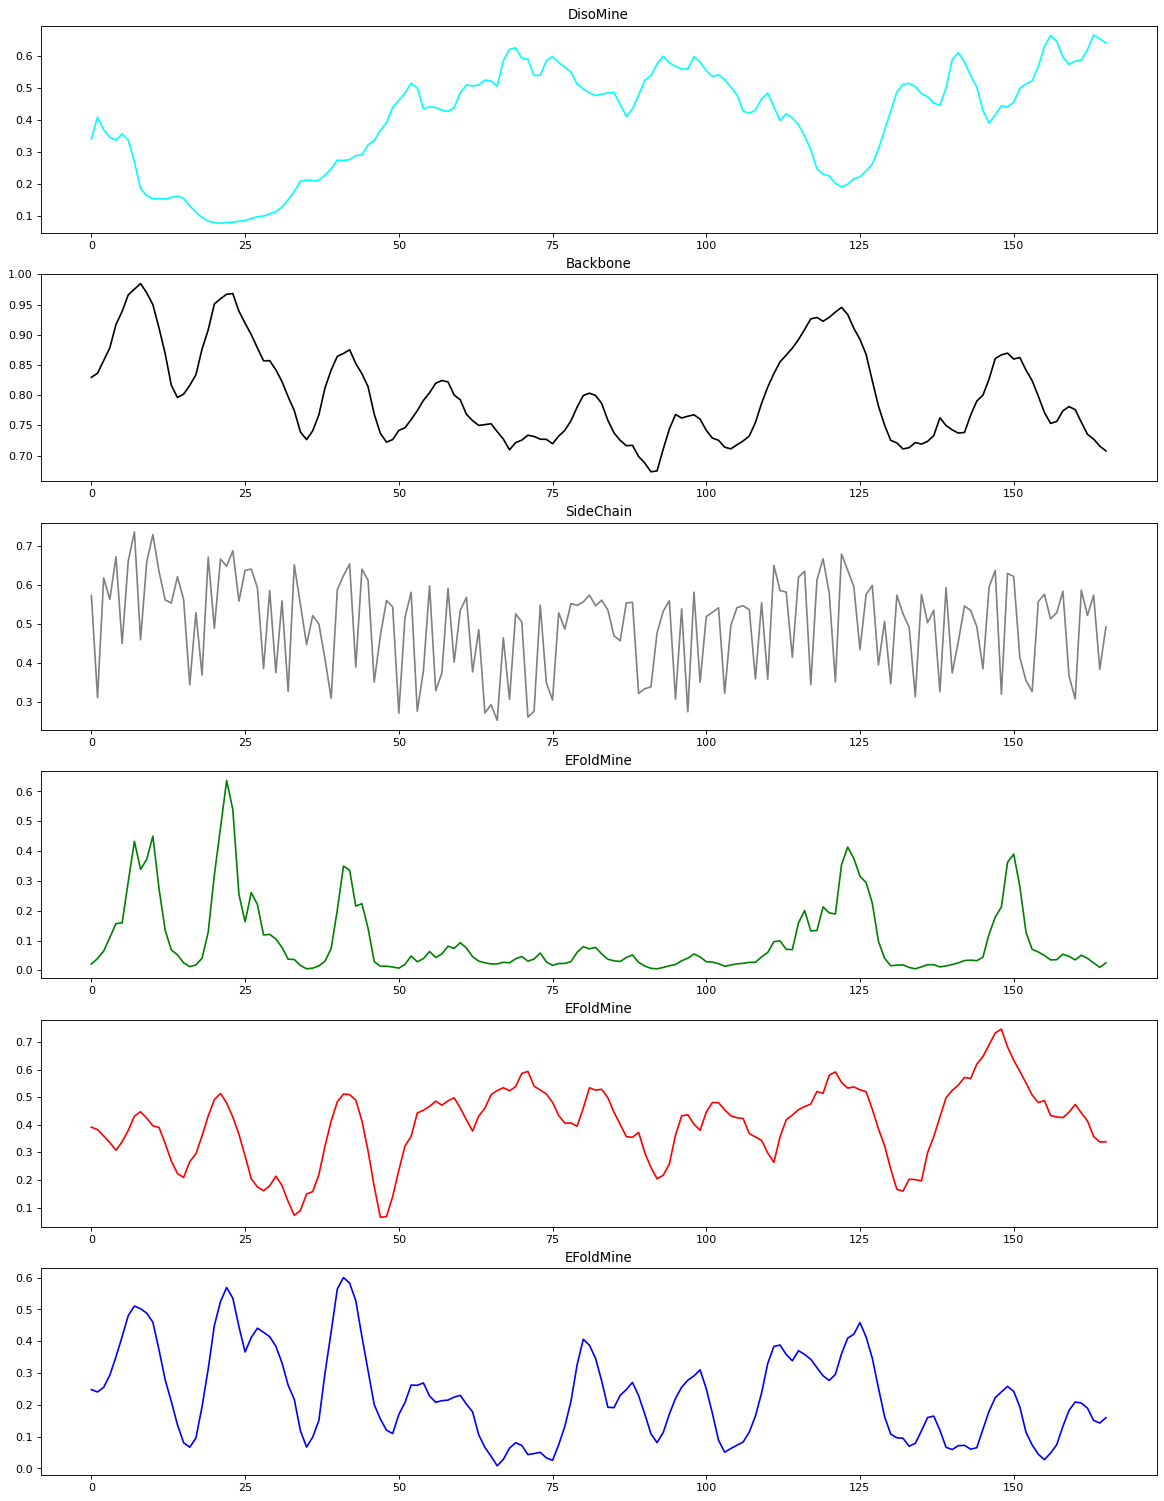

In [8]:
import matplotlib.pyplot as plt
import json

# Read input Json file
file = open(predJsonFile, 'r')
input = file.read()
request_json = json.loads(input)

# Note that here we are showing the results for the first protein - index 0 in the results list
currentProteinIndex = 0

# residue index
seq = request_json["results"][currentProteinIndex]['sequence']
#DisoMine Score
disomine = [value for value in request_json["results"][currentProteinIndex]['disoMine'] if value != None]
#backbone Score
backbone = [value for value in request_json["results"][currentProteinIndex]['backbone'] if value != None]
#sidechain Score
sidechain = [value for value in request_json["results"][currentProteinIndex]['sidechain'] if value != None]
#efoldmine Score
efoldmine = [value for value in request_json["results"][currentProteinIndex]['earlyFolding'] if value != None]
#helix propensity Score
helix = [value for value in request_json["results"][currentProteinIndex]['helix'] if value != None]
#sheet propensity Score
sheet = [value for value in request_json["results"][currentProteinIndex]['sheet'] if value != None]
# creating a plot
fig = plt.figure(figsize=(18, 24), dpi= 80, facecolor='w', edgecolor='k')

#Plotting the DisoMine results
axes = fig.add_subplot(611)
axes.plot(range(len(seq)), disomine, color="cyan")
axes.set_title("DisoMine")

#Plotting the Backbone results 
axes = fig.add_subplot(612)
axes.plot(range(len(seq)), backbone, color="black")
axes.set_title("Backbone")

#Plotting the SideChain results
axes = fig.add_subplot(613)
axes.plot(range(len(seq)), sidechain, color="grey")
axes.set_title("SideChain")

#Plotting the EFoldMine results
axes = fig.add_subplot(614)
axes.plot(range(len(seq)), efoldmine, color="g")
axes.set_title("EFoldMine")

#Plotting the helix propensity results
axes = fig.add_subplot(615)
axes.plot(range(len(seq)), helix, color="r")
axes.set_title("EFoldMine")

#Plotting the sheet propensity results
axes = fig.add_subplot(616)
axes.plot(range(len(seq)), sheet, color="b")
axes.set_title("EFoldMine")



plt.show()